In [1]:
%cd ".."

/home/ensai/projet-statistique-2022


In [2]:
import pandas as pd
import itertools
import json
import numpy as np
import scipy as sp
import random
import matplotlib.pyplot as plt
import matplotlib as mtp
import seaborn as sns
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.manifold import MDS
import multiprocessing


from word_embedding.distance_wmd import *
import mantel_test.correlation as mantel_parallel
from reduction_dim.correlation_matrix import *

# Cbow

In [3]:
# Read WMD matrix
mat_cbow_wmd = np.array(lecture_fichier_distances_wmd("distances_cbow.7z"))

In [4]:
nb_doc = mat_cbow_wmd.shape[0]
flat_index = np.triu_indices(nb_doc)

In [5]:
#Direct Embedding
direct_emb = np.copy(mat_cbow_wmd)
direct_distance = euclidean_distances(direct_emb)
direct_pearson = correlation_epsilon(initial_distance=mat_cbow_wmd,new_distance=direct_distance,epsilon=np.inf,type="pearson")
direct_spearman = correlation_epsilon(initial_distance=mat_cbow_wmd,new_distance=direct_distance,epsilon=np.inf,type="spearman")

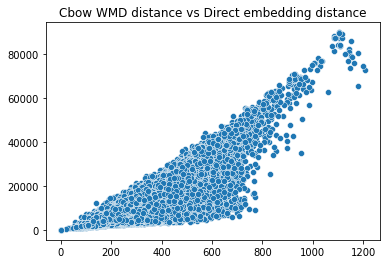

Correlation Pearson Direct embedding 0.8130785868769771
Correlation Spearman Direct embedding 0.8104178120765806


In [10]:
sample_size = 10**5
sample_index = random.sample(range(len(flat_index[0])),k=sample_size)
sns.scatterplot(y=direct_distance[(flat_index[0][sample_index],flat_index[1][sample_index])], 
         x=mat_cbow_wmd[(flat_index[0][sample_index],flat_index[1][sample_index])])
plt.title("Cbow WMD distance vs Direct embedding distance")
plt.show()
print(f"Correlation Pearson Direct embedding {direct_pearson}")
print(f"Correlation Spearman Direct embedding {direct_spearman}")

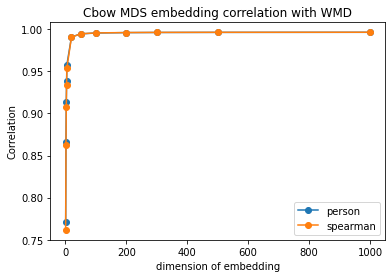

Plus petite dimension dont la correlation est supérieur à 0.99:  20


In [17]:
#read mds tuning
df_mds_cbow = pd.read_csv("data/tuning/MDS/evaluation_cbow.csv",sep=";")
plt.plot(df_mds_cbow["dim"],df_mds_cbow["corr_p"],"o-",label="person")
plt.plot(df_mds_cbow["dim"],df_mds_cbow["corr_s"],"o-",label="spearman")
plt.xlabel("dimension of embedding")
plt.ylabel("Correlation")
plt.legend()
plt.title("Cbow MDS embedding correlation with WMD")
plt.show()

print("Plus petite dimension dont la correlation est supérieur à 0.99: ",np.min(df_mds_cbow.loc[np.where(df_mds_cbow["corr_p"] >= 0.99),"dim"]))

In [58]:
cow_mds_dim = int(df_mds_cbow.loc[np.where(df_mds_cbow["corr_p"] >= 0.99),"dim"].min())
cbow_mds_model = MDS(n_components=cow_mds_dim, dissimilarity="precomputed",n_jobs=multiprocessing.cpu_count()-3)
mds_embedding = cbow_mds_model.fit_transform(mat_cbow_wmd)

In [ ]:
mds_embedding

# Skipgram

In [24]:
# Read WMD matrix
mat_skipgram_wmd = np.array(lecture_fichier_distances_wmd("distances_skipgram.7z"))

In [25]:
#Direct Embedding
direct_emb = np.copy(mat_skipgram_wmd)
direct_distance = euclidean_distances(direct_emb)
direct_pearson = correlation_epsilon(initial_distance=mat_skipgram_wmd,new_distance=direct_distance,epsilon=np.inf,type="pearson")
direct_spearman = correlation_epsilon(initial_distance=mat_skipgram_wmd,new_distance=direct_distance,epsilon=np.inf,type="spearman")

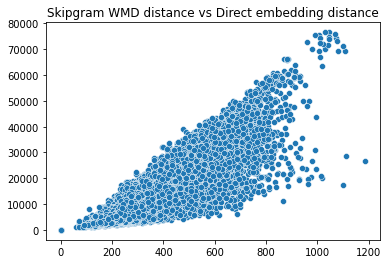

Correlation Pearson Direct embedding 0.8762043336150973
Correlation Spearman Direct embedding 0.8496276853830445


In [26]:
sample_size = 10**5
sample_index = random.sample(range(len(flat_index[0])),k=sample_size)
sns.scatterplot(y=direct_distance[(flat_index[0][sample_index],flat_index[1][sample_index])], 
         x=mat_skipgram_wmd[(flat_index[0][sample_index],flat_index[1][sample_index])])
plt.title("Skipgram WMD distance vs Direct embedding distance")
plt.show()
print(f"Correlation Pearson Direct embedding {direct_pearson}")
print(f"Correlation Spearman Direct embedding {direct_spearman}")

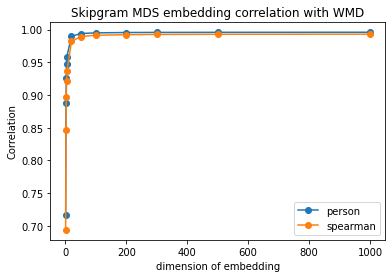

Plus petite dimension dont la correlation est supérieur à 0.99:  50


In [15]:
#read mds tuning
df_mds_skipgram = pd.read_csv("data/tuning/MDS/evaluation_skipgram.csv",sep=";")
plt.plot(df_mds_skipgram["dim"],df_mds_skipgram["corr_p"],"o-",label="person")
plt.plot(df_mds_skipgram["dim"],df_mds_skipgram["corr_s"],"o-",label="spearman")
plt.xlabel("dimension of embedding")
plt.ylabel("Correlation")
plt.legend()
plt.title("Skipgram MDS embedding correlation with WMD")
plt.show()

print("Plus petite dimension dont la correlation est supérieur à 0.99: ",np.min(df_mds_skipgram.loc[np.where(df_mds_skipgram["corr_p"] >= 0.99),"dim"]))

# Glove

Glove: Modele Word embedding dimension 300

Glove2: Modele Word embedding dimension 80 

In [28]:
# Read WMD matrix
mat_glove_wmd = np.array(lecture_fichier_distances_wmd("distances_glove.7z"))
mat_glove2_wmd = np.array(lecture_fichier_distances_wmd("distances_glove2.7z"))

In [33]:
#Direct Embedding
direct_emb = np.copy(mat_glove_wmd)
direct_distance = euclidean_distances(direct_emb)
direct_pearson = correlation_epsilon(initial_distance=mat_glove_wmd,new_distance=direct_distance,epsilon=np.inf,type="pearson")
direct_spearman = correlation_epsilon(initial_distance=mat_glove_wmd,new_distance=direct_distance,epsilon=np.inf,type="spearman")

#Direct Embedding
direct_emb = np.copy(mat_glove2_wmd)
direct_distance2 = euclidean_distances(direct_emb)
direct_pearson2 = correlation_epsilon(initial_distance=mat_glove2_wmd,new_distance=direct_distance,epsilon=np.inf,type="pearson")
direct_spearman2 = correlation_epsilon(initial_distance=mat_glove2_wmd,new_distance=direct_distance,epsilon=np.inf,type="spearman")

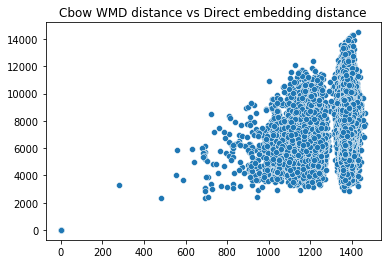

Glove Correlation Pearson Direct embedding 0.1736290501641769
Glove Correlation Spearman Direct embedding 0.1737865394638935


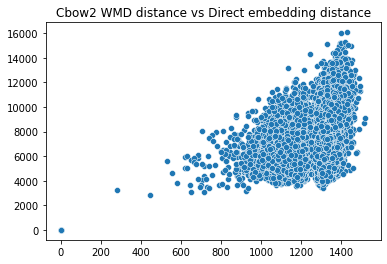

Glove2: Correlation Pearson Direct embedding 0.197290258006515
Glove2: Correlation Spearman Direct embedding 0.18808789574706


In [35]:
sample_size = 10**5
sample_index = random.sample(range(len(flat_index[0])),k=sample_size)
sns.scatterplot(y=direct_distance[(flat_index[0][sample_index],flat_index[1][sample_index])], 
         x=mat_glove_wmd[(flat_index[0][sample_index],flat_index[1][sample_index])])
plt.title("Cbow WMD distance vs Direct embedding distance")
plt.show()
print(f"Glove Correlation Pearson Direct embedding {direct_pearson}")
print(f"Glove Correlation Spearman Direct embedding {direct_spearman}")

sns.scatterplot(y=direct_distance2[(flat_index[0][sample_index],flat_index[1][sample_index])], 
         x=mat_glove2_wmd[(flat_index[0][sample_index],flat_index[1][sample_index])])
plt.title("Cbow2 WMD distance vs Direct embedding distance")
plt.show()
print(f"Glove2: Correlation Pearson Direct embedding {direct_pearson2}")
print(f"Glove2: Correlation Spearman Direct embedding {direct_spearman2}")

In [9]:
#read mds tuning
df_mds_glove = pd.read_csv("data/tuning/MDS/evaluation_glove.csv",sep=";")
df_mds_glove2 = df_mds_glove[df_mds_glove["model"] == "glove2"].reset_index()
df_mds_glove = df_mds_glove[df_mds_glove["model"] == "glove"].reset_index()

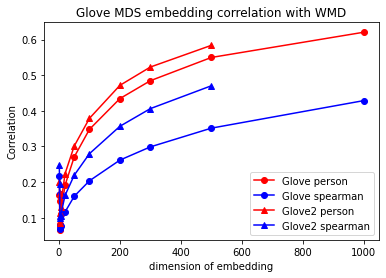

In [10]:
plt.plot(df_mds_glove.loc[np.where(df_mds_glove["dim"] <= 1000),"dim"],df_mds_glove.loc[np.where(df_mds_glove["dim"] <= 1000),"corr_p"],"o-",label="Glove person",color='red')
plt.plot(df_mds_glove.loc[np.where(df_mds_glove["dim"] <= 1000),"dim"],df_mds_glove.loc[np.where(df_mds_glove["dim"] <= 1000),"corr_s"],"o-",label="Glove spearman",color='blue')
plt.plot(df_mds_glove2.loc[np.where(df_mds_glove2["dim"] <= 1000),"dim"],df_mds_glove2.loc[np.where(df_mds_glove2["dim"] <= 1000),"corr_p"],"^-",label="Glove2 person",color='red')
plt.plot(df_mds_glove2.loc[np.where(df_mds_glove2["dim"] <= 1000),"dim"],df_mds_glove2.loc[np.where(df_mds_glove2["dim"] <= 1000),"corr_s"],"^-",label="Glove2 spearman",color='blue')
plt.xlabel("dimension of embedding")
plt.ylabel("Correlation")
plt.legend()
plt.title("Glove MDS embedding correlation with WMD")
plt.show()


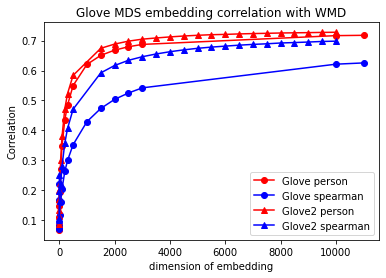

In [13]:
plt.plot(df_mds_glove["dim"],df_mds_glove["corr_p"],"o-",label="Glove person",color='red')
plt.plot(df_mds_glove["dim"],df_mds_glove["corr_s"],"o-",label="Glove spearman",color='blue')
plt.plot(df_mds_glove2["dim"],df_mds_glove2["corr_p"],"^-",label="Glove2 person",color='red')
plt.plot(df_mds_glove2["dim"],df_mds_glove2["corr_s"],"^-",label="Glove2 spearman",color='blue')
plt.xlabel("dimension of embedding")
plt.ylabel("Correlation")
plt.legend()
plt.title("Glove MDS embedding correlation with WMD")
plt.show()
